In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:'no',1:'yes'})

#we have converted or Replacing the value 0 with no and 1 with yes..... in seniorCitizen 

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Count the number of customers who left (1) and stayed (0)
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

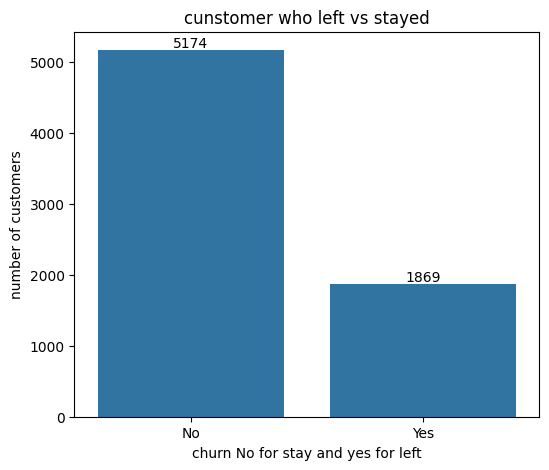

In [14]:
plt.figure(figsize= (6,5))
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("cunstomer who left vs stayed")
plt.xlabel("churn No for stay and yes for left")
plt.ylabel("number of customers")
plt.show()

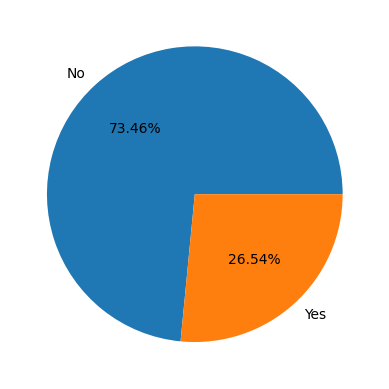

In [15]:
plt.pie(churn_counts,labels = churn_counts.index,autopct = "%1.2f%%")
plt.show()

#From the given pie char we can conclude that 26.54% of the customers have chrun
#Now let explpore and find the reason behind that

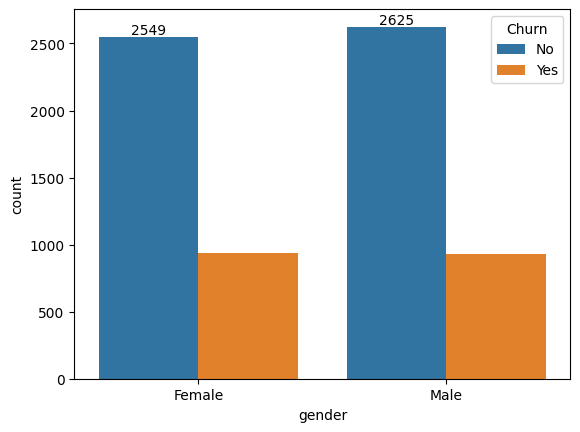

In [16]:
ax = sns.countplot(x = "gender",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

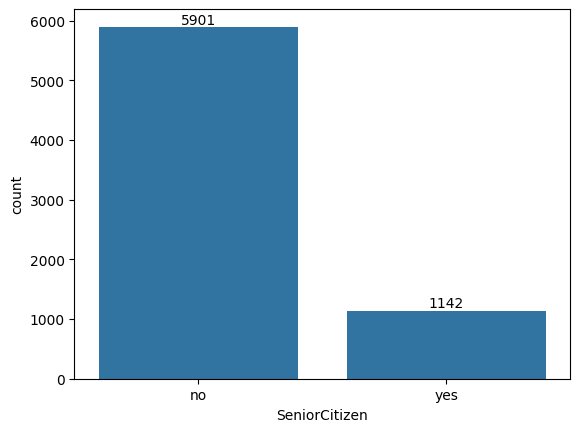

In [17]:
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.show()

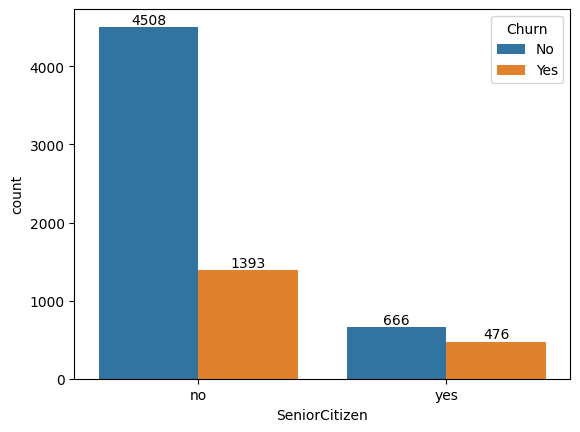

In [18]:
# Create the countplot
ax = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")

# Add count labels for both Churn categories
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

In [19]:
SC = df["SeniorCitizen"].value_counts()
SC

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

#From 7043 only 1143 are SeniorCiticen and out of which 476 have chrun.......which is large

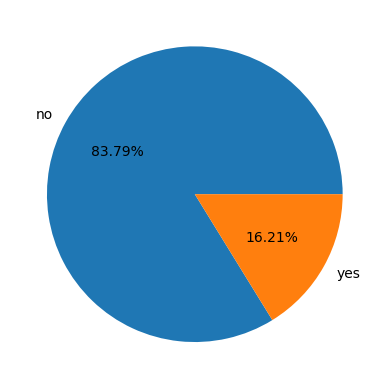

In [20]:
plt.pie(SC,labels = SC.index,autopct = "%1.2f%%")
plt.show()

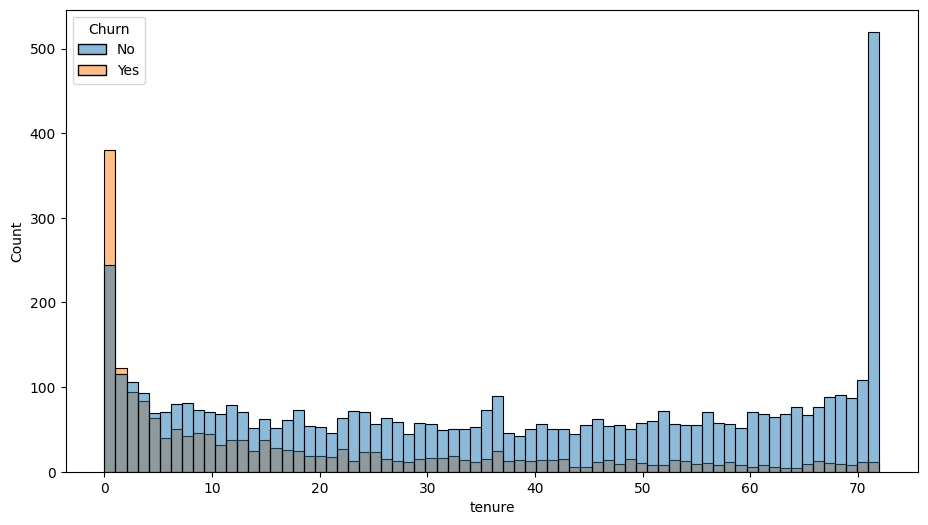

In [21]:
plt.figure(figsize = (11,6))
sns.histplot(x = "tenure",data = df,bins = 70,hue = "Churn")
plt.show()

#People who ahve used the services for long period have Stayed and People who have used the services for one month or two have churned

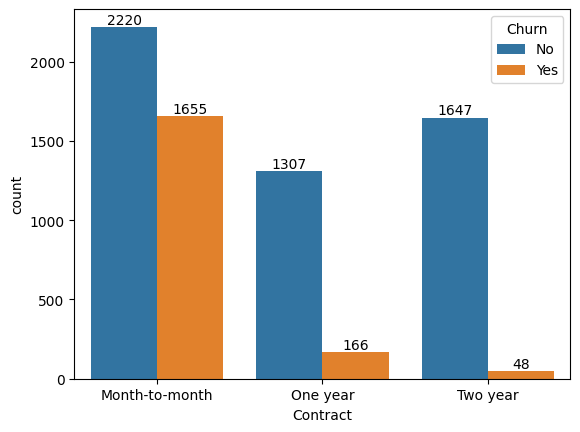

In [22]:
ax = sns.countplot(x = "Contract",data = df,hue = "Churn")
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#Number of how have contact for one year and two are more likely to saty or not chaurn.... but..peolple how have contract for month... churn more

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

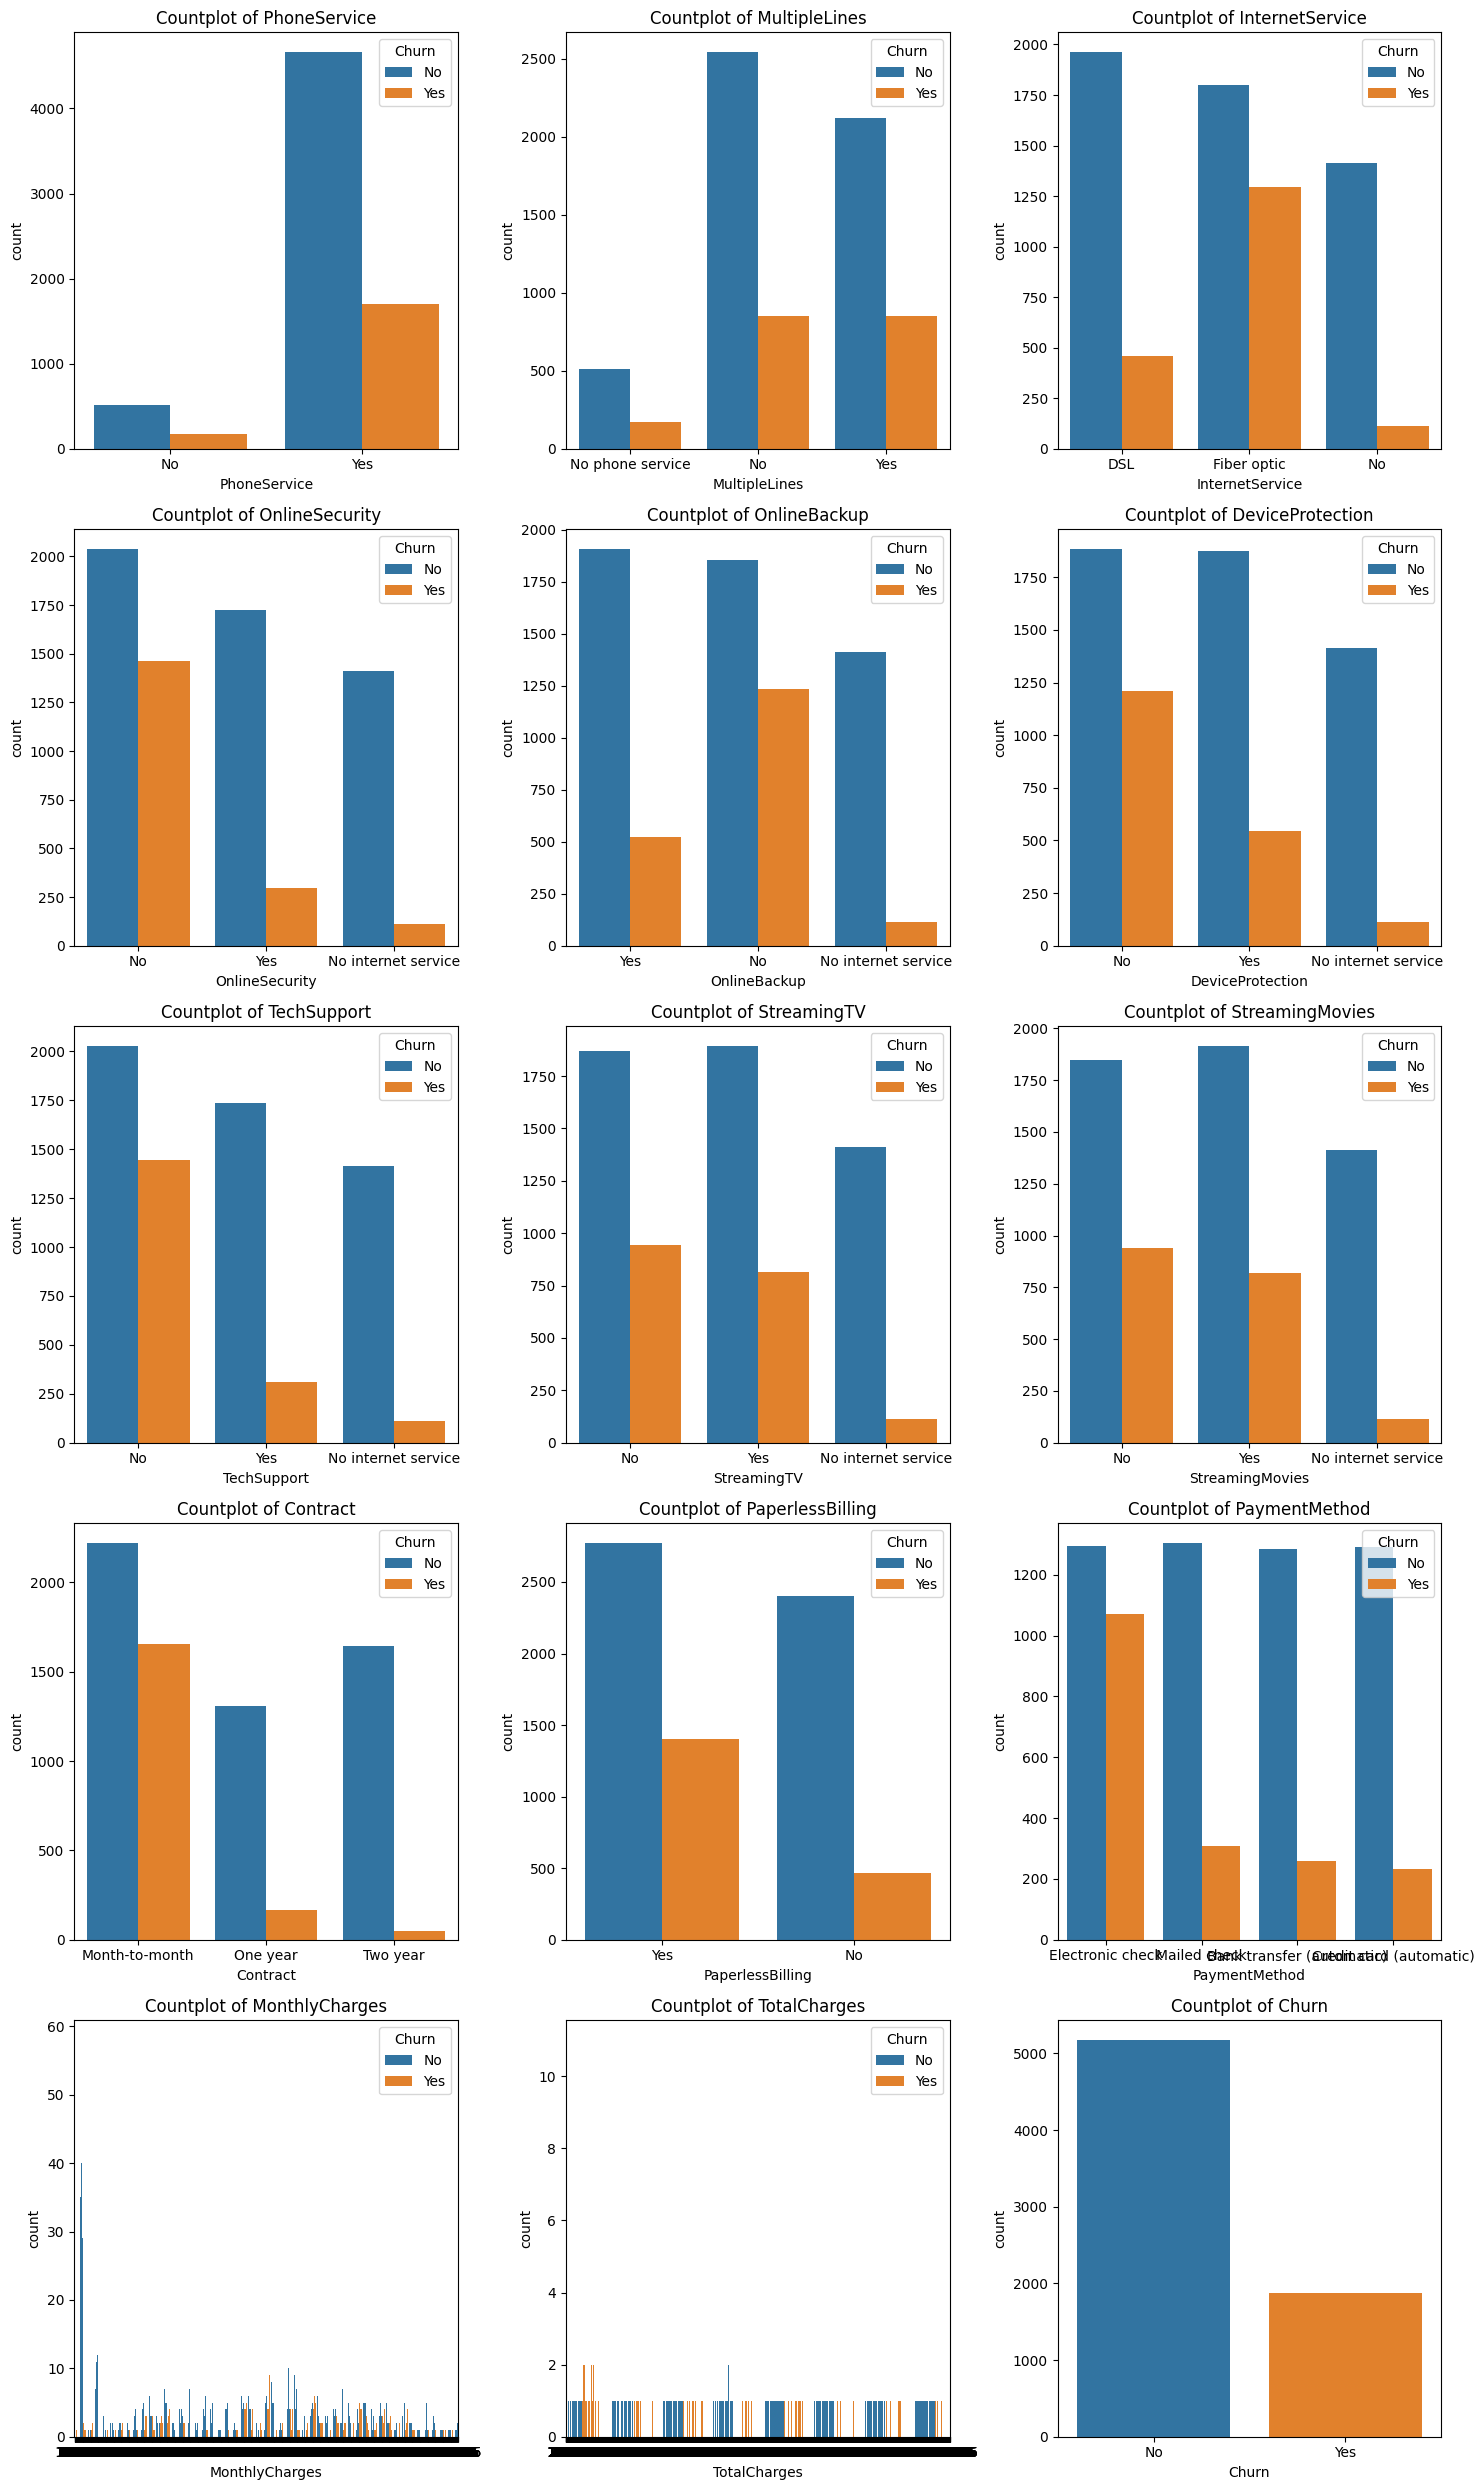

In [24]:
# SP list of columns
SP = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
      'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Set up the figure size and number of subplots
num_columns = len(SP)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Adjust for the number of columns per row

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten axes array to easily iterate through
axes = axes.flatten()

# Create a countplot for each column in SP list
for i, col in enumerate(SP):
    sns.countplot(x=col, data=df, ax=axes[i],hue = df["Churn"])
    axes[i].set_title(f'Countplot of {col}')

# Hide any empty subplots if the number of columns doesn't divide evenly
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
#The majority of the customers who do not churn tend to have services like Phoneservices,InternetServices(particularly DSL) anf OnlineSecurity enabled,For services like OnlineBackup ,TechSupport and StreamingTV churn rate are noticeably higher when these services are not used or are 

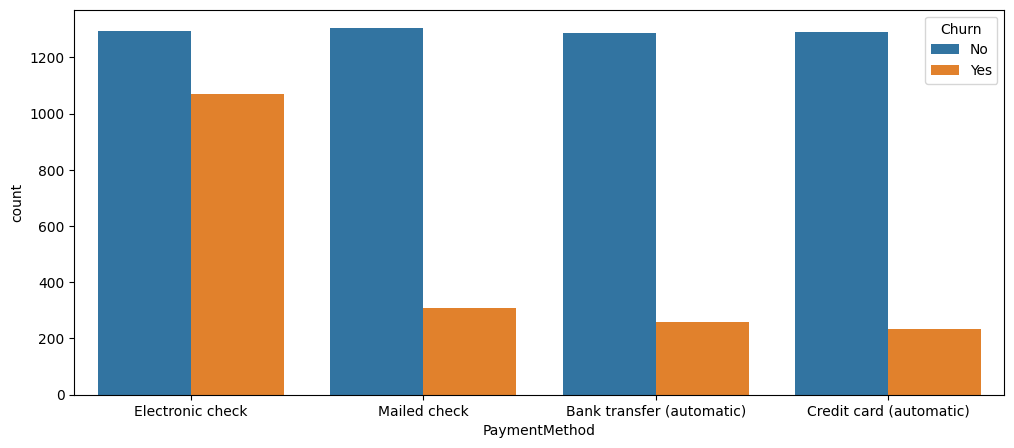

In [26]:
plt.figure(figsize =(12,5))
sns.countplot(x= "PaymentMethod",data = df,hue = "Churn")
plt.show()

#customer is likely to churn when he is using the Electronic check for payment method